We import a test dataframe on which we are going to run our analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
filename = Path("/home/ma/a/am1118/data/original/US Trading Equity Data/2015/Trades201501.txt.gz")
month_df=pd.read_csv(filename.absolute().as_uri(), sep="|")

/home/ma/a/am1118/res_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We drop NaN values only on columns which we are going to use

In [2]:
#remove NaN OrderId
import numpy as np
month_df.dropna(axis=0, subset=["OrderId","oNumber","Volume","dvOC"], inplace=True)
month_df.reset_index(drop=True)
month_df.shape

(1553130, 101)

Here we show that there is a **unique correspondence** between OrderId and oNumber.<br>
The numerical value is not the same but, since they are just labels,for our analysis we can just choose one of the two. <br>
First we group either by **OrderId** or **oNumber** and then we count by using **nunique** how many different oNumbers are there for each OrderId, or viceversa. <br>
Then we make a dataframe in which we store the ones for which there are multiple oNumber for each OrderId. We see that the dataframe is NOT ***Empty***.

In [27]:
check = month_df[['OrderId',"oNumber"]].groupby("OrderId")

test = check["oNumber"].nunique().to_frame()
no_one = test.drop(test[test["oNumber"]==1].index, inplace=False)

print(no_one)

                     oNumber
OrderId                     
503099                     2
504038                     2
505978                     2
506012                     2
506212                     2
...                      ...
ClTrdr=KWILLIAMSON;        7
ClTrdr=MHERRMANN;          2
ClTrdr=PCORDTS;            5
ClTrdr=RHOOPER;           23
ClTrdr=SBAUER;             2

[15178 rows x 1 columns]


Index([               503099,                504038,                505978,
                      506012,                506212,                506232,
                      506250,                506394,                506497,
                      506519,
       ...
        '898859282456576708',  '923858397746227697',  '992859415126050384',
          'ClTrdr=DJUSSILA;',      'ClTrdr=JBELDY;', 'ClTrdr=KWILLIAMSON;',
         'ClTrdr=MHERRMANN;',     'ClTrdr=PCORDTS;',     'ClTrdr=RHOOPER;',
            'ClTrdr=SBAUER;'],
      dtype='object', name='OrderId', length=15178)

Having shown that OrderId and oNumber are equivalent we just drop OrderId since it contains mixed types. 

In [4]:
#dropping OrderId
month_df.drop(columns=["OrderId"])

ClientType  BrokerCode  Stockkey Symbol      Cusip  DomicileCode  \
0                 2        7950     31341    AMX  02364W105           484   
1                 2        7950     31341    AMX  02364W105           484   
108               2        7950     25761    IDA  451107106           840   
109               2          60     27554   PVTB  742962103           840   
110               2        7950     27554   PVTB  742962103           840   
...             ...         ...       ...    ...        ...           ...   
2104220           2           0     55683    DPS  26138E109           840   
2104221           2           0     55683    DPS  26138E109           840   
2104222           2           0     55683    DPS  26138E109           840   
2104223           2           0     55683    DPS  26138E109           840   
2104224           2           0     55683    DPS  26138E109           840   

        Market Currency            TradeDate Country  ...       opPX  \
0           US      USD  2015-01-02 00:00:00      MX  ...  21.840252   
1           US      USD  2015-01-02 00:00:00      MX  ...  21.840252   
108         US      USD  2015-01-02 00:00:00      US  ...  66.313614   
109         US      USD  2015-01-02 00:00:00      US  ...  33.352631   
110         US      USD  2015-01-02 00:00:00      US  ...  33.352631   
...        ...      ...                  ...     ...  ...        ...   
2104220     US      USD  2015-01-09 00:00:00      US  ...  74.220795   
2104221     US      USD  2015-01-09 00:00:00      US  ...  74.220795   
2104222     US      USD  2015-01-09 00:00:00      US  ...  73.963264   
2104223     US      USD  2015-01-22 00:00:00      US  ...  78.760406   
2104224     US      USD  2015-01-27 00:00:00      US  ...  79.219048   

             ovPX       opOT                odtOT       opET  \
0        961750.0  21.930153  2015-01-02 15:20:00  21.886824   
1        961750.0  21.930153  2015-01-02 15:20:00  21.886824   
108      624187.0  67.123466  2014-12-31 20:34:00  67.123466   
109      676485.0  33.781319  2014-12-31 20:35:00  33.781319   
110      676485.0  33.781319  2014-12-31 20:35:00  33.781319   
...           ...        ...                  ...        ...   
2104220   28279.0  74.237503  2015-01-09 13:54:00  74.220802   
2104221   28279.0  74.237503  2015-01-09 13:54:00  74.220802   
2104222    2105.0  74.237503  2015-01-09 13:54:00  73.963264   
2104223    6150.0  79.619255  2015-01-22 14:30:00  78.771065   
2104224    3258.0  78.373543  2015-01-27 14:30:00  79.219048   

                       odtET       opPT                odtPT      opPre  \
0        2015-01-02 16:29:00  21.881813  2015-01-02 16:32:00  22.095438   
1        2015-01-02 16:29:00  21.881813  2015-01-02 16:32:00  22.095438   
108      2014-12-31 20:34:00  67.123466  2014-12-31 20:34:00  68.885139   
109      2014-12-31 20:35:00  33.781319  2014-12-31 20:35:00  33.981651   
110      2014-12-31 20:35:00  33.781319  2014-12-31 20:35:00  33.981651   
...                      ...        ...                  ...        ...   
2104220  2015-01-09 14:30:00  74.220802  2015-01-09 14:30:00  73.295128   
2104221  2015-01-09 14:30:00  74.220802  2015-01-09 14:30:00  73.295128   
2104222  2015-01-09 20:01:00  73.963264  2015-01-09 20:01:00  73.295128   
2104223  2015-01-22 18:31:00  78.771065  2015-01-22 18:31:00  77.970345   
2104224  2015-01-27 20:08:00  79.219048  2015-01-27 20:08:00  78.786629   

            opPost  
0        21.356869  
1        21.356869  
108      65.682259  
109      32.178719  
110      32.178719  
...            ...  
2104220  73.799080  
2104221  73.799080  
2104222  73.799080  
2104223  78.786629  
2104224  78.750114  

[1553130 rows x 100 columns]

Below we see that there are metaorders taking place on multiple days. For example, if we consider the first row (oNumber =1.0), we see the total number of child order is 6 (Total) but the order is taking place over 3 days (TradeDate).

In [5]:
oNumb=month_df.groupby(["oNumber"])
by_date=oNumb["TradeDate"].nunique().to_frame()
by_date["Total"]= oNumb["TradeDate"].count()
print(by_date)

           TradeDate  Total
oNumber                    
1.0                3      6
2.0                6      7
3.0                5     10
4.0                4      5
5.0                8     14
...              ...    ...
2073396.0          1      1
2073397.0          1      1
2073405.0          1      1
2073407.0          1      3
2073412.0          1      1

[236261 rows x 2 columns]


Now we take only Metaorders which last one Trading day or less. We also see ( check oNumber = 2073407.0 ) that there might be the case in which, during a single day, a metaorder deploys 3 child orders.

In [6]:
clean_metaorder_index= by_date.drop(by_date[by_date["TradeDate"]!=1].index)
print(clean_metaorder_index)

           TradeDate  Total
oNumber                    
45.0               1      1
46.0               1      1
157.0              1      1
158.0              1      1
159.0              1      1
...              ...    ...
2073396.0          1      1
2073397.0          1      1
2073405.0          1      1
2073407.0          1      3
2073412.0          1      1

[196226 rows x 2 columns]


Hence we see that there are **on average** about 4 child order per metaorder (considering only metaorders lasting 1 day) 

In [7]:
clean_metaorder_index["Total"].mean()

4.455612406103167

Hence we use the list from oNumber to select the good metaorders, which are going to be stored in **good_df**

In [8]:
meta_list = clean_metaorder_index.index.values
good_df = month_df[month_df["oNumber"].isin(meta_list)].drop(columns=["OrderId"]).reset_index(drop=True)

**Fractional Daily Volume for child orders (individual rows)**

In [9]:
#we try column dvOC
#considering each row as a metaorder
child_df = good_df['Volume'] /good_df['dvOC']


We prepare the dataframes for metaorders

In [10]:
#meta_num_df=month_df.groupby(['oNumber'])["Volume"].sum()
month_df.groupby('oNumber',sort=False)["Volume"].sum()
meta_df=good_df.groupby('oNumber',sort=True, as_index = True)["Volume"].sum().to_frame()
#meta_df["Fractional Vol"]= 
#meta_dv_onumb=month_df.groupby('oNumber',sort=False, as_index=False)["dvOC"].mean()

Cross Check to see if code above does what is supposed to do. <br>
We see that the average metaorder volume divided by the average child order volume returns the average number of child orders per metaorder as expected.

In [11]:
meta_df.mean()/ month_df[month_df["oNumber"].isin(meta_list)]["Volume"].mean()

Volume    4.455612
dtype: float64

We make the consistency check to see that there is only one daily volume for each metaorder oNumber. Again Empty Dataframe so everything is okay.

In [12]:
check_unique=good_df.groupby('oNumber',sort=True, as_index = True)["dvOC"].nunique().to_frame()

In [13]:
multiple_daily_vol=check_unique.drop(check_unique[check_unique!=1].index, inplace=False)
print(multiple_daily_vol)

Empty DataFrame
Columns: [dvOC]
Index: []


In [14]:
daily_vol=good_df.groupby('oNumber',sort=True, as_index = True)["dvOC"].mean().to_frame()

In [15]:
daily_vol.head()

dvOC
oNumber           
45.0     5642596.0
46.0     4525711.0
157.0    2717072.0
158.0    2388673.0
159.0    2388673.0

**Fractional Daily volume for metaorders grouped by 'oNumber'**

In [16]:
meta_frac = meta_df["Volume"]/daily_vol["dvOC"]
meta_frac.head()

oNumber
45.0     0.001005
46.0     0.001250
157.0    0.001107
158.0    0.008639
159.0    0.000235
dtype: float64

**PLOTS**

CDF for MetaOrder Fractional Volume **(Is this binning right?)**

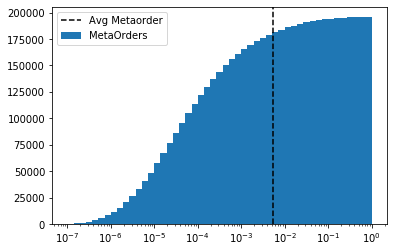

In [17]:
MIN , MAX = 0.0000001, 1
avg_meta= meta_frac.mean()
avg_child= child_df.mean()
plt.hist(meta_frac, cumulative=True, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50), range=(0, 0.2), label='MetaOrders')
plt.axvline(x=avg_meta, color= 'k', linestyle='--', label = "Avg Metaorder")
plt.gca().set_xscale("log")
plt.legend(loc='upper left')
plt.show()

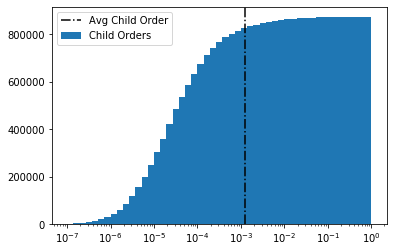

In [18]:
MIN , MAX = 0.0000001, 1
plt.hist(child_df, cumulative=True, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50), range=(0, 0.2), label='Child Orders')
plt.axvline(x=avg_child,  color= 'k', linestyle='-.', label = "Avg Child Order")
plt.gca().set_xscale("log")
plt.legend(loc='upper left')
plt.show()

**Overlaid**

No log scale on y axis

0.0053787368947286205 0.0012145787607887196


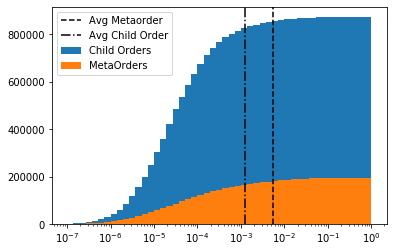

In [19]:
MIN , MAX = 0.0000001, 1
plt.hist(child_df, cumulative=True, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50), range=(0, 0.2), label='Child Orders')
plt.hist(meta_frac, cumulative=True, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50), range=(0, 0.2), label='MetaOrders')

print(avg_meta,avg_child)
plt.axvline(x=avg_meta, color= 'k', linestyle='--', label = "Avg Metaorder")
plt.axvline(x=avg_child,  color= 'k', linestyle='-.', label = "Avg Child Order")
plt.gca().set_xscale("log")
plt.legend(loc='upper left')
plt.show()

***Side Notes for future Ancerno Research***

The following columns are important when looking at times and date related to orders:

**odtET** = Order Entry datetime

**odtPT** = Order placement datetime

**xdtX** = Execution Time: Time when execution is reported, if provided by the client.

TO DO:
CORRECT FOR oNumber and OrderId not being equivalent.